In [ ]:
!unzip geoBoundaries-ROU-ADM1-all.zip -d ADM1

Archive:  geoBoundaries-ROU-ADM1-all.zip
  inflating: ADM1/geoBoundaries-ROU-ADM1-metaData.json  
  inflating: ADM1/geoBoundaries-ROU-ADM1-metaData.txt  
  inflating: ADM1/CITATION-AND-USE-geoBoundaries.txt  
  inflating: ADM1/geoBoundaries-ROU-ADM1.shp  
  inflating: ADM1/geoBoundaries-ROU-ADM1.shx  
  inflating: ADM1/geoBoundaries-ROU-ADM1.dbf  
  inflating: ADM1/geoBoundaries-ROU-ADM1.prj  
  inflating: ADM1/geoBoundaries-ROU-ADM1.topojson  
  inflating: ADM1/geoBoundaries-ROU-ADM1.geojson  
  inflating: ADM1/geoBoundaries-ROU-ADM1_simplified.shp  
  inflating: ADM1/geoBoundaries-ROU-ADM1_simplified.shx  
  inflating: ADM1/geoBoundaries-ROU-ADM1_simplified.dbf  
  inflating: ADM1/geoBoundaries-ROU-ADM1_simplified.prj  
  inflating: ADM1/geoBoundaries-ROU-ADM1_simplified.topojson  
  inflating: ADM1/geoBoundaries-ROU-ADM1_simplified.geojson  
  inflating: ADM1/geoBoundaries-ROU-ADM1-PREVIEW.png  


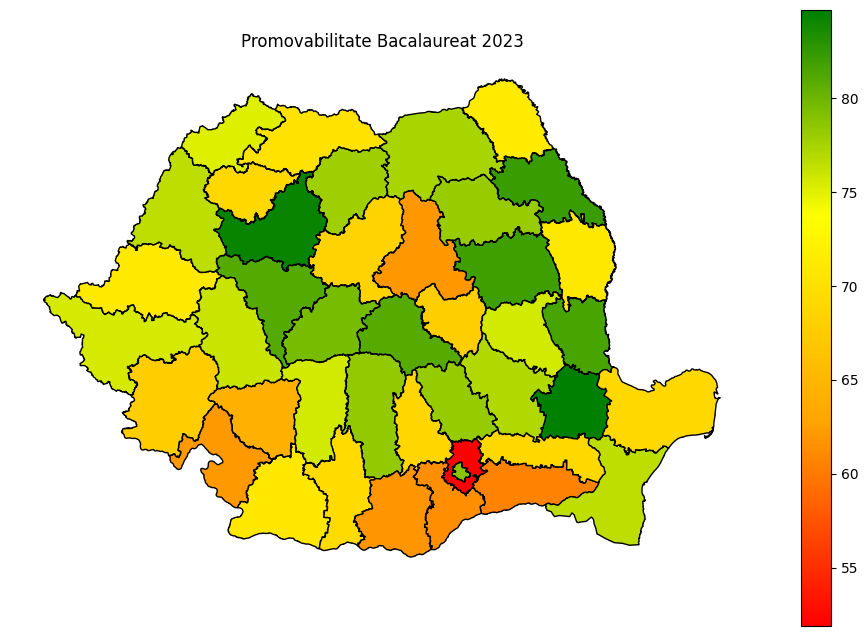

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

romania_map = gpd.read_file('ADM1/geoBoundaries-ROU-ADM1.shp')

excel_file = 'romania_map_values.xlsx'
data_df = pd.read_excel(excel_file)

ro_data = {
    'shapeName': data_df["name"],
    'value': data_df["value"]
}

ro_df = pd.DataFrame(ro_data)

merged_data = romania_map.merge(ro_df, on='shapeName', how='left')

merged_data['value'].fillna(0, inplace=True)

cmap = LinearSegmentedColormap.from_list('custom', ['red','orange', 'yellow', 'green'])
#cmap = LinearSegmentedColormap.from_list('custom', ['green','yellow', 'orange', 'red'])

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

merged_data.plot(column='value', cmap=cmap, ax=ax, edgecolor='k', legend=True)

ax.set_title('Promovabilitate Bacalaureat 2023')
ax.set_axis_off()

plt.savefig('romania_map.png', dpi=300, bbox_inches='tight')